# MATPLOTLIB VISUALIZATION USING GRADIO

In [1]:
import pandas as pd

# sample data

data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}

df = pd.DataFrame(data)

In [2]:
df

,Month,Sales,Profit
0,Jan,10000,2000
1,Feb,12000,3000
2,Mar,15000,4000
3,Apr,13000,2500
4,May,17000,3500
5,Jun,16000,3000


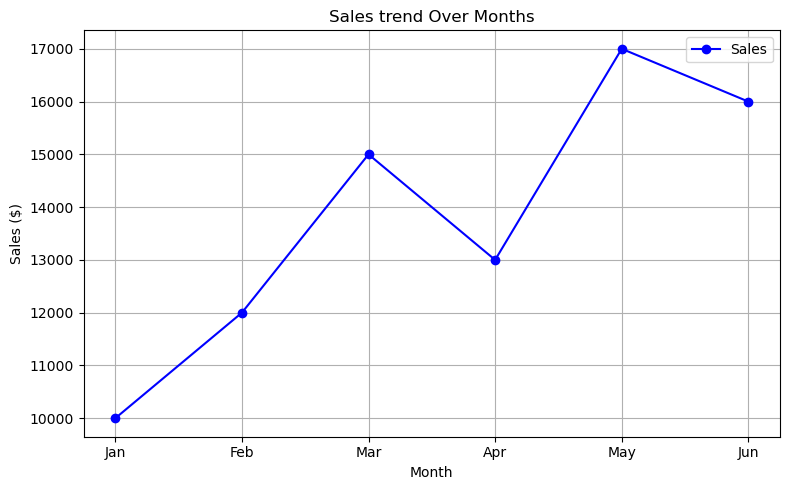

In [4]:
# 1- line plot sales over time

import matplotlib.pyplot as plt

# line plot: sales over time
plt.figure(figsize=(8,5))
plt.plot(df['Month'], df['Sales'], color='blue', marker='o', linestyle='-', label='Sales')
plt.title('Sales trend Over Months')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# output: A line plot showing the sales trend over the months.

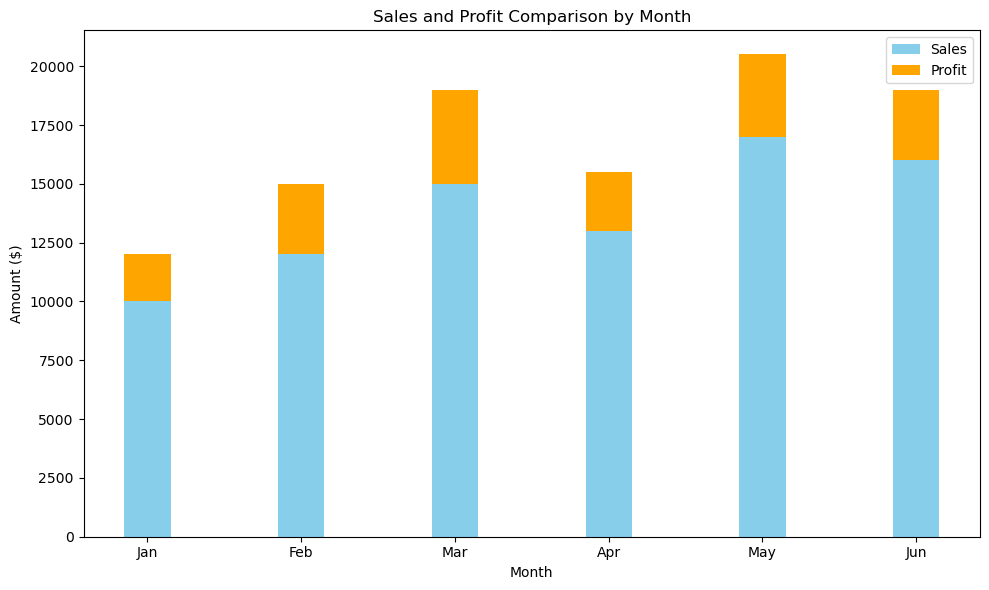

In [7]:
# Bar plot: Sales vs Profit by month

plt.figure(figsize=(10,6))
width = 0.3
plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
plt.title('Sales and Profit Comparison by Month')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()

# A stacked bar plot where you can compare sales and profit for each month.

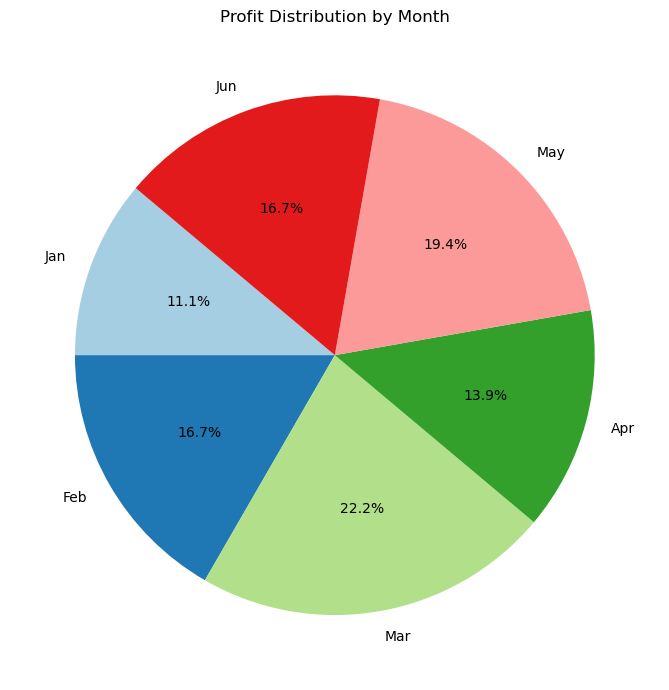

In [9]:
# pie chart: Profit Distibution by month

plt.figure(figsize=(7,7))
plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profit Distribution by Month')
plt.tight_layout()
plt.show() 

# A pie chart displaying the proportion of profit distribution for each month.

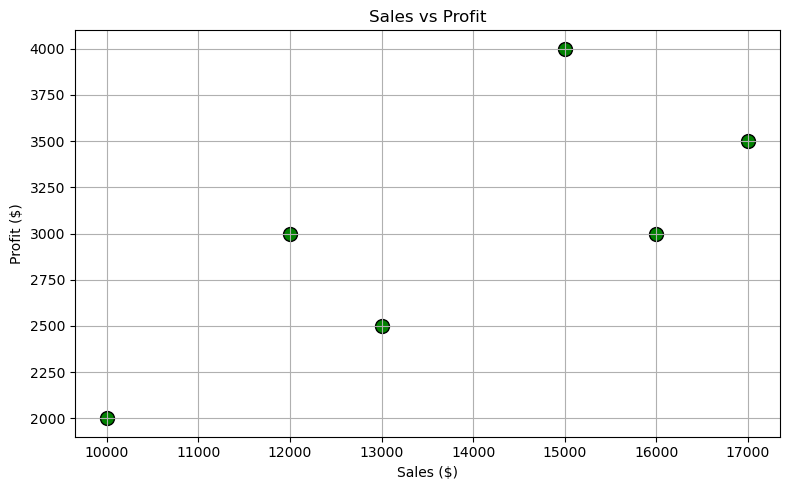

In [12]:
# Scatter plot: Sales vs Profit (Correlation)

plt.figure(figsize=(8,5))
plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
plt.title('Sales vs Profit')
plt.xlabel('Sales ($)')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# A scatter plot showing the correlation between Sales and profit.

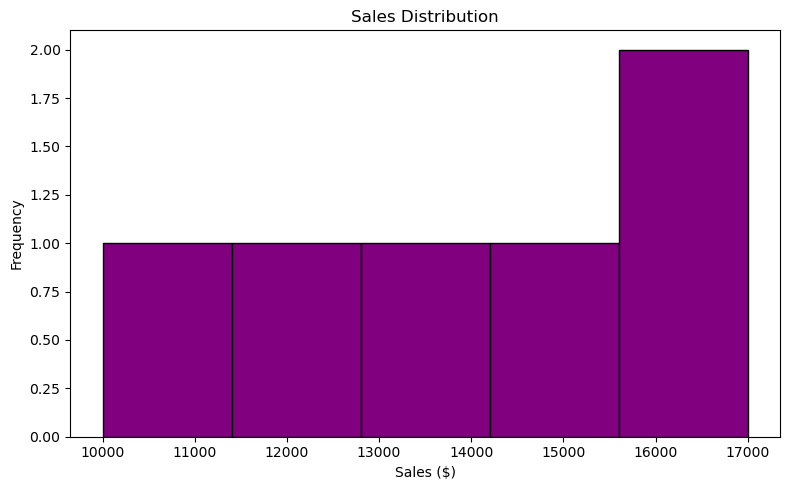

In [14]:
# Histogram: Distribution of Sales

plt.figure(figsize=(8,5))
plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# A histogram showing the distribution of sales values across months.

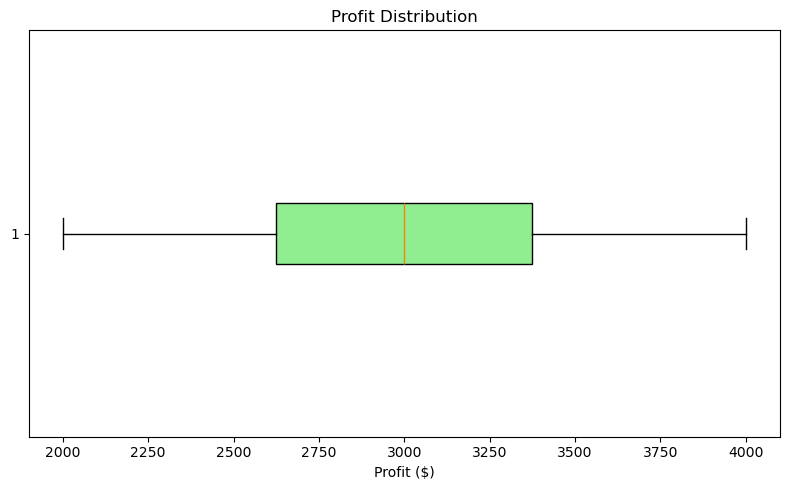

In [16]:
# Box plot: profit distribution

plt.figure(figsize=(8,5))
plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title('Profit Distribution')
plt.xlabel('Profit ($)')
plt.tight_layout()
plt.show()

# a box plot showing the spread and outliers of profit.


In [17]:
!pip install gradio

   ---------------------------------------- 0.0/60.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/60.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/60.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/60.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/60.2 MB 1.0 MB/s eta 0:01:00
    --------------------------------------- 0.8/60.2 MB 1.2 MB/s eta 0:00:49
    --------------------------------------- 1.0/60.2 MB 1.1 MB/s eta 0:00:52
    --------------------------------------- 1.3/60.2 MB 1.2 MB/s eta 0:00:50
   - -------------------------------------- 1.8/60.2 MB 1.4 MB/s eta 0:00:43
   - -------------------------------------- 2.1/60.2 MB 1.3 MB/s eta 0:00:45
   - -------------------------------------- 2.6/60.2 MB 1.5 MB/s eta 0:00:39
   -- ------------------------------------- 3.1/60.2 MB 1.6 MB/s eta 0:00:36
   -- ------------------------------------- 3.4/60.2 MB 1.6 MB/s eta 0:00:36
   -- ---------------------

In [20]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Sales": [10000, 12000, 15000, 13000, 17000, 16000],
    "Profit": [2000, 3000, 4000, 2500, 3500, 3000]
}
df = pd.DataFrame(data)

# Function to return selected plot
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8, 5))

    if plot_type == "Line Plot":
        plt.plot(df['Month'], df['Sales'], color='blue', marker='o', label='Sales')
        plt.title('Sales Trend Over Months')
        plt.xlabel('Month')
        plt.ylabel('Sales ($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == "Stacked Bar Chart":
        fig.set_size_inches(10, 6)
        width = 0.3
        plt.bar(df['Month'], df['Sales'], width=width, label='Sales', color='skyblue')
        plt.bar(df['Month'], df['Profit'], width=width, label='Profit', color='orange', bottom=df['Sales'])
        plt.title('Sales and Profit Comparison by Month')
        plt.xlabel('Month')
        plt.ylabel('Amount ($)')
        plt.legend()

    elif plot_type == "Pie Chart":
        fig.set_size_inches(7, 7)
        plt.pie(df['Profit'], labels=df['Month'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title('Profit Distribution by Month')

    elif plot_type == "Scatter Plot":
        plt.scatter(df['Sales'], df['Profit'], color='green', s=100, edgecolors='black')
        plt.title('Sales vs Profit')
        plt.xlabel('Sales ($)')
        plt.ylabel('Profit ($)')
        plt.grid(True)

    elif plot_type == "Histogram":
        plt.hist(df['Sales'], bins=5, color='purple', edgecolor='black')
        plt.title('Sales Distribution')
        plt.xlabel('Sales ($)')
        plt.ylabel('Frequency')

    elif plot_type == "Box Plot":
        plt.boxplot(df['Profit'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
        plt.title('Profit Distribution')
        plt.xlabel('Profit ($)')

    plt.tight_layout()
    return fig

# Gradio UI
demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ["Line Plot", "Stacked Bar Chart", "Pie Chart", "Scatter Plot", "Histogram", "Box Plot"],
        label="Choose Plot Type"
    ),
    outputs=gr.Plot(label="Visualization"),
    title="Sales & Profit Visual Explorer",
    description="Choose a chart type to visualize the data."
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
